homework 8
---
due: May 17 2022

authors: pegler, prüwasser, scheftner

import libraries

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def sigmoid_fun(x):
    """
    Returns probability for y = 1
    """
    return 1 / (1 + np.exp(-x))

### function `make_log_data`

In [7]:
def make_log_data(b_0, b_1, X):
    """
    Returns outcome array y for give intercept, slope and input matrix X
    """
    if type(X) != np.array:
        X = np.array(X)
    p_y = sigmoid_fun(b_0 + b_1 * X)
    y = [np.random.binomial(1, p) for p in p_y]
    
    return y

### function `fit_log`

In [8]:
def fit_log(X, y):
    """
    Returns intercept and slope for
    fitted logistic regression with 1 slope
    """
    reg = LogisticRegression()
    reg.fit(X.reshape(-1, 1), y)
    b_0 = reg.intercept_.ravel()[0]
    b_1 = reg.coef_.ravel()[0]
    
    return b_0, b_1

### explore

try to change the number of participants

In [9]:
N = 100

X_gen = np.linspace(-25, 25, N)
b_0_gen = 1.5
b_1_gen = .12

### 1 simulation

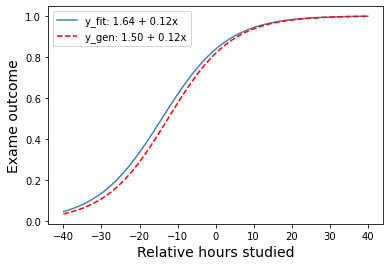

In [50]:
X_linspace = np.sort(np.linspace(-40, 40, 100)) # this we need only fot the plot

N = 100
X_gen = np.linspace(-25, 25, N)
b_0, b_1 = fit_log(X_gen, make_log_data(b_0_gen, b_1_gen, X_gen))

y_fit = (sigmoid_fun(b_0 + b_1 * X_linspace)).ravel()
y_gen = (sigmoid_fun(b_0_gen + b_1_gen * X_linspace)).ravel()

plt.figure()
plt.plot(X_linspace, y_fit, label = f"y_fit: {b_0:.2f} + {b_1:.2f}x", color = "#4682b4")
plt.plot(X_linspace, y_gen, label = f"y_gen: {b_0_gen:.2f} + {b_1_gen:.2f}x", color = "red", linestyle = "--")

plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14)
plt.legend();

### 500 simulations, different Ns

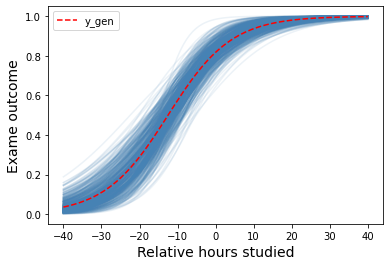

In [18]:
X_linspace = np.sort(np.linspace(-40, 40, 100)) # this we need only fot the plot

N = 100
n_simulations = 500

X_gen = np.linspace(-25, 25, N)
y_gen = (sigmoid_fun(b_0_gen + b_1_gen * X_linspace)).ravel()

plt.figure()

for i in range(0, n_simulations):
    b_0, b_1 = fit_log(X_gen, make_log_data(b_0_gen, b_1_gen, X_gen))
    y_fit = (sigmoid_fun(b_0 + b_1 * X_linspace)).ravel()
    plt.plot(X_linspace, y_fit, alpha = .1, color = "#4682b4")

plt.plot(X_linspace, y_gen, label = "y_gen", color = "red", linestyle = "--")
    
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14)
plt.legend();

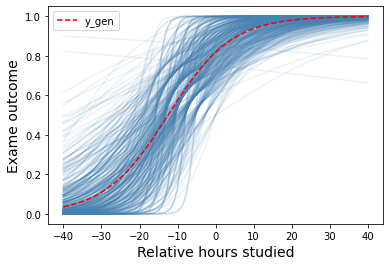

In [16]:
N = 20
n_simulations = 500

X_gen = np.linspace(-25, 25, N)
y_gen = (sigmoid_fun(b_0_gen + b_1_gen * X_linspace)).ravel()

plt.figure()

for i in range(0, n_simulations):
    b_0, b_1 = fit_log(X_gen, make_log_data(b_0_gen, b_1_gen, X_gen))
    y_fit = (sigmoid_fun(b_0 + b_1 * X_linspace)).ravel()
    plt.plot(X_linspace, y_fit, alpha = .1, color = "#4682b4")

plt.plot(X_linspace, y_gen, label = "y_gen", color = "red", linestyle = "--")
    
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14)
plt.legend();

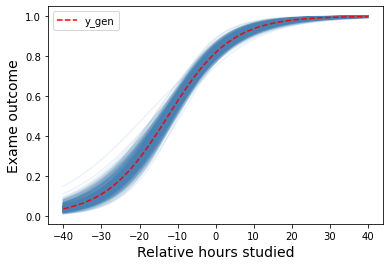

In [40]:
N = 500
n_simulations = 500

X_gen = np.linspace(-25, 25, N)
y_gen = (sigmoid_fun(b_0_gen + b_1_gen * X_linspace)).ravel()

plt.figure()

for i in range(0, n_simulations):
    b_0, b_1 = fit_log(X_gen, make_log_data(b_0_gen, b_1_gen, X_gen))
    y_fit = (sigmoid_fun(b_0 + b_1 * X_linspace)).ravel()
    plt.plot(X_linspace, y_fit, alpha = .1, color = "#4682b4")

plt.plot(X_linspace, y_gen, label = "y_gen", color = "red", linestyle = "--")
    
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14)
plt.legend();

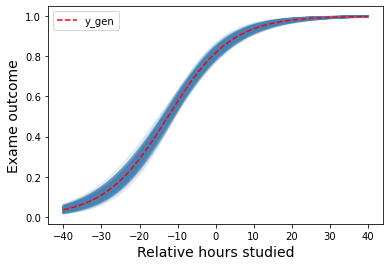

In [39]:
N = 1000
n_simulations = 500

X_gen = np.linspace(-25, 25, N)
y_gen = (sigmoid_fun(b_0_gen + b_1_gen * X_linspace)).ravel()

plt.figure()

for i in range(0, n_simulations):
    b_0, b_1 = fit_log(X_gen, make_log_data(b_0_gen, b_1_gen, X_gen))
    y_fit = (sigmoid_fun(b_0 + b_1 * X_linspace)).ravel()
    plt.plot(X_linspace, y_fit, alpha = .1, color = "#4682b4")

plt.plot(X_linspace, y_gen, label = "y_gen", color = "red", linestyle = "--")
    
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14)
plt.legend();

### Example: Likelihood of the data

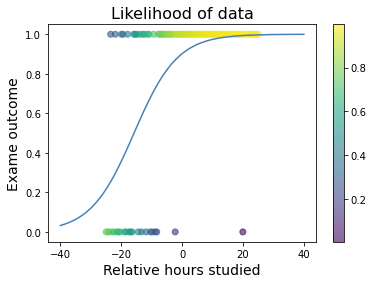

In [101]:
# there is still an intercept and a slope that we can use to create some sample binary targets
y_target = make_log_data(b_0, b_1, X_gen)

# fit and create the predictions in form of classification and probabilities
reg = LogisticRegression()
reg.fit(X_gen.reshape(-1, 1), y_target)
y_pred = reg.predict(X_gen.reshape(-1, 1))
p_y = (sigmoid_fun(reg.intercept_.ravel()[0] + reg.coef_.ravel()[0] * X_gen.reshape(-1, 1))).ravel()

# create a likelihood array for the plot
y_lh = y_target * p_y + (np.ones(len(y_target)) - y_target) * (np.ones(len(p_y)) - p_y)

# plot
plt.scatter(X_gen, y_target, c =y_lh, alpha = 0.6)
plt.colorbar()

plt.plot(X_linspace, (sigmoid_fun(reg.intercept_.ravel()[0] + reg.coef_.ravel()[0] * X_linspace.reshape(-1, 1))).ravel(), label = f"y_fit: {reg.intercept_.ravel()[0]:.2f} + {reg.coef_.ravel()[0]:.2f}x", color = "#4682b4")
plt.xlabel('Relative hours studied',fontsize=14)
plt.ylabel('Exame outcome',fontsize=14)
plt.title("Likelihood of data", fontsize=16);